# Digit Recognizer

### Download data

In [11]:
from dblue_stores import StoreManager
store = StoreManager(dataset_id="dblue-demo-datasets")
store.download_dir("digit-recognizer", "/dblue/home/data")
!ls /dblue/home/data

sample_submission.csv  test.csv  train.csv


### Install libraries

In [12]:
# install libraries
!pip3 install keras
!pip3 install numpy
!pip3 install pandas
!pip3 install bcolz
!pip3 install tensorflow
!pip3 install matplotlib
!pip3 install sklearn

In [13]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, ZeroPadding2D, MaxPooling2D
from keras import optimizers

import pandas as pd
import numpy as np
import bcolz

In [14]:
train = pd.read_csv('/dblue/home/data/train.csv')
test = pd.read_csv('/dblue/home/data/test.csv')

In [15]:
train.shape

(42000, 785)

In [16]:
test.shape

(28000, 784)

### Split features and label

In [17]:
def get_dataset(train, test):
    train_features = train.iloc[:,1:]
    train_labels = train.iloc[:,0]
    train_features = np.array(train_features).astype(np.uint8)
    test_features = np.array(test).astype(np.uint8)
    return train_features, train_labels, test_features


train_features, train_labels, test_features = get_dataset(train, test)

### View Image

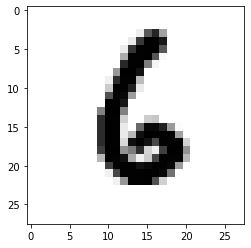

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

train_features = np.array(train_features).reshape((-1, 1, 28, 28)).astype(np.uint8)
test_features = np.array(test).reshape((-1, 1, 28, 28)).astype(np.uint8)

plt.imshow(train_features[1730][0], cmap=cm.binary) # draw the picture

### 1. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [20]:
train_features, train_labels, test_features = get_dataset(train, test)

In [21]:
m = RandomForestClassifier(n_estimators=100)
m.fit(train_features, train_labels)
pred = m.predict(test_features)
pred

array([2, 0, 9, ..., 3, 9, 2])

In [22]:
scores = cross_val_score(m, train_features, train_labels, cv=5)
scores

array([0.96216538, 0.96477449, 0.96154304, 0.96570204, 0.96581706])

### 2. Basic Keras Model

Convert labels to one hot encoding - transforming the vector of class integers into a binary matrix.

In [23]:
train_features, train_labels, test_features = get_dataset(train, test)

In [24]:
train_labels = np_utils.to_categorical(train_labels)
train_labels.shape

(42000, 10)

Normalize inputs from 0-255 pixel to 0-1

In [25]:
train_features = train_features / 255.0
test_features = test / 255.0

In [26]:
num_pixels = train_features.shape[1]
num_classes = train_labels.shape[1]
print(num_pixels, num_classes)

784 10


In [27]:
def model(num_pixels, num_classes):
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
    model.add(Dense(num_classes, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [28]:
# build the model
m = model(num_pixels, num_classes)

W0802 13:44:34.893066 139652157290304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  after removing the cwd from sys.path.
W0802 13:44:35.134850 139652157290304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 13:44:35.162425 139652157290304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

/usr/local/lib/python3.6/dist-packages/ipykernel

In [29]:
# Fit the model
m.fit(train_features, train_labels, validation_split=0.33, nb_epoch=10, batch_size=200, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  
W0802 13:44:35.443051 139652157290304 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0802 13:44:35.497942 139652157290304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 28139 samples, validate on 13861 samples
Epoch 1/10
 - 5s - loss: 0.4024 - acc: 0.8842 - val_loss: 0.2046 - val_acc: 0.9431
Epoch 2/10
 - 5s - loss: 0.1676 - acc: 0.9524 - val_loss: 0.1462 - val_acc: 0.9584
Epoch 3/10
 - 4s - loss: 0.1103 - acc: 0.9697 - val_loss: 0.1368 - val_acc: 0.9589
Epoch 4/10
 - 5s - loss: 0.0770 - acc: 0.9789 - val_loss: 0.0996 - val_acc: 0.9690
Epoch 5/10
 - 5s - loss: 0.0571 - acc: 0.9851 - val_loss: 0.0973 - val_acc: 0.9708
Epoch 6/10
 - 5s - loss: 0.0422 - acc: 0.9893 - val_loss: 0.0929 - val_acc: 0.9716
Epoch 7/10
 - 5s - loss: 0.0310 - acc: 0.9929 - val_loss: 0.0869 - val_acc: 0.9735
Epoch 8/10
 - 5s - loss: 0.0226 - acc: 0.9960 - val_loss: 0.0822 - val_acc: 0.9758
Epoch 9/10
 - 5s - loss: 0.0167 - acc: 0.9973 - val_loss: 0.0821 - val_acc: 0.9763
Epoch 10/10
 - 5s - loss: 0.0127 - acc: 0.9984 - val_loss: 0.0827 - val_acc: 0.9751


In [30]:
def predict(model, test_features, save=True):
    prediction = m.predict(test_features)
    train_classes = prediction.argmax(axis=-1)

    if save:
        with open('result.csv', 'w') as f:
            f.write('ImageId,Label\n')

            for index, item in enumerate(train_classes):
                f.write("%d,%d\n" % (index + 1, item))
    return train_classes

In [31]:
predict(m, test_features)

array([2, 0, 9, ..., 3, 9, 2])

### 3. Simple Convolutional Neural Network

In [32]:
train_features, train_labels, test_features = get_dataset(train, test)

# reshape to be [samples][pixels][width][height]
train_features = train_features.reshape(-1, 1, 28, 28).astype('float32')
test_features = test_features.reshape(-1, 1, 28, 28).astype('float32')
train_features = train_features / 255.0
test_features = test_features / 255.0
train_labels = np_utils.to_categorical(train_labels)
num_classes = 10

In [33]:
def model(num_classes):
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [34]:
train_labels

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [35]:
from keras import backend as K
K.set_image_dim_ordering('th')

m = model(num_classes)
# Fit the model
m.fit(train_features, train_labels, validation_split=0.33, nb_epoch=10, batch_size=200, verbose=2)


W0802 13:45:25.417010 139652157290304 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0802 13:45:25.452651 139652157290304 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 28139 samples, validate on 13861 samples
Epoch 1/10
 - 39s - loss: 0.3704 - acc: 0.8926 - val_loss: 0.1514 - val_acc: 0.9556
Epoch 2/10
 - 38s - loss: 0.1162 - acc: 0.9658 - val_loss: 0.1020 - val_acc: 0.9687
Epoch 3/10
 - 37s - loss: 0.0780 - acc: 0.9770 - val_loss: 0.0690 - val_acc: 0.9803
Epoch 4/10
 - 37s - loss: 0.0572 - acc: 0.9828 - val_loss: 0.0652 - val_acc: 0.9802
Epoch 5/10
 - 37s - loss: 0.0458 - acc: 0.9863 - val_loss: 0.0691 - val_acc: 0.9774
Epoch 6/10
 - 38s - loss: 0.0392 - acc: 0.9884 - val_loss: 0.0561 - val_acc: 0.9836
Epoch 7/10
 - 36s - loss: 0.0337 - acc: 0.9892 - val_loss: 0.0537 - val_acc: 0.9848
Epoch 8/10
 - 36s - loss: 0.0260 - acc: 0.9922 - val_loss: 0.0532 - val_acc: 0.9849
Epoch 9/10
 - 36s - loss: 0.0231 - acc: 0.9927 - val_loss: 0.0562 - val_acc: 0.9834
Epoch 10/10
 - 36s - loss: 0.0207 - acc: 0.9932 - val_loss: 0.0474 - val_acc: 0.9870


In [36]:
predict(m, test_features)

array([2, 0, 9, ..., 3, 9, 2])

### 4. Larger Convolutional Neural Network

In [37]:
def model(num_classes):
    # create model
    model = Sequential()
    model.add(Conv2D(30, (3, 3), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, 3, 3, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [38]:
m = model(num_classes)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(15, (3, 3), activation="relu")`
  


In [39]:
m.fit(train_features, train_labels, validation_split=0.33, nb_epoch=10, batch_size=200, verbose=2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 28139 samples, validate on 13861 samples
Epoch 1/10
 - 41s - loss: 0.7270 - acc: 0.7714 - val_loss: 0.1876 - val_acc: 0.9418
Epoch 2/10
 - 42s - loss: 0.1897 - acc: 0.9399 - val_loss: 0.1054 - val_acc: 0.9667
Epoch 3/10
 - 41s - loss: 0.1288 - acc: 0.9594 - val_loss: 0.0842 - val_acc: 0.9728
Epoch 4/10
 - 41s - loss: 0.1055 - acc: 0.9671 - val_loss: 0.0720 - val_acc: 0.9776
Epoch 5/10
 - 39s - loss: 0.0845 - acc: 0.9732 - val_loss: 0.0807 - val_acc: 0.9762
Epoch 6/10
 - 38s - loss: 0.0740 - acc: 0.9758 - val_loss: 0.0611 - val_acc: 0.9796
Epoch 7/10
 - 37s - loss: 0.0650 - acc: 0.9799 - val_loss: 0.0523 - val_acc: 0.9830
Epoch 8/10
 - 36s - loss: 0.0580 - acc: 0.9823 - val_loss: 0.0527 - val_acc: 0.9836
Epoch 9/10
 - 37s - loss: 0.0526 - acc: 0.9833 - val_loss: 0.0467 - val_acc: 0.9852
Epoch 10/10
 - 37s - loss: 0.0474 - acc: 0.9848 - val_loss: 0.0442 - val_acc: 0.9863


In [40]:
predict(m, test_features)

array([2, 0, 9, ..., 3, 9, 2])